# Step 0: import and reading data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [1]:
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 500)

In [62]:
df_base = pd.read_csv('./archive/Base.csv')

# Step 1: Data understanding

In [19]:
df_base.shape

(1000000, 32)

In [27]:
df_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [29]:
df_base.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [31]:
df_base.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [78]:
df_base.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [63]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [64]:
df_base.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [125]:
# Get categorical_features columns in the DataFrame
categorical_features = [x for x in df_base.columns if df_base[x].dtype == 'object' or df_base[x].dtype == 'bool']
print("Categorical features:")
print(categorical_features)

Categorical features :
['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [112]:
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [91]:
numerical_features = [x for x in df_base.columns if df_base[x].nunique() > 12]

print("Numerical Features: ")
print(numerical_features)

Numerical Features: 
['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes']


In [103]:
# Create a list of categorical features
categorical_features = [x for x in df_base.columns if df_base[x].nunique() <= 12 and df_base[x].nunique()>= 2]
print("Categorical Features:")
print(categorical_features)

Categorical Features:
['fraud_bool', 'income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'month']


In [89]:
missing_value_val = [x for x in df_base.columns if (df_base[x].min() == -1)]

print("Features with missing values represented by -1:")
print(missing_value_val)

Features with missing values represented by -1:
['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']


# Step 2: Data preparation

In [36]:
df_base.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [41]:
df_base.duplicated()
# df_base.loc[df_base.duplicated()]
# df_base.duplicated(subset=['credit_risk_score'])

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [48]:
# df_base_no_dup = df_base.loc[~df_base.duplicated(subset=['fraud_bool','income','customer_age'])]
# df_base_no_dup.shape

(155, 32)

In [76]:
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
print(fraud_vals)

             count
fraud_bool        
0           988971
1            11029


In [68]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

/var/folders/5x/snggv9g97tx0k82qkcyy_sp40000gn/T/ipykernel_6102/2044925366.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)


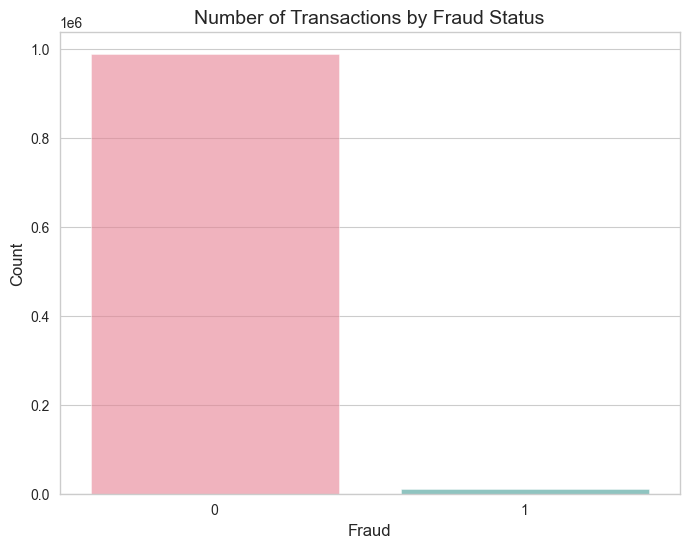

In [77]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()


It's a highly imbalanced dataset

## 2.1 Cleaning Missing Value of Features

In [79]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            bank_months_count  session_length_in_minutes  \
fraud_bool                                                 
0                       25.23                       0.20   
1                       37.54                       0.16   

            device_distinct_emails_8w  
fraud_bool                             
0                                0.04  
1                                0.04  


In [80]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                        feature  fraud_bool  missing_vals
0     prev_address_months_count           0         71.06
1     prev_address_months_count           1         91.89
2  current_address_months_count           0          0.43
3  current_address_months_count           1          0.13
4             bank_months_count           0         25.23
5             bank_months_count           1         37.54
6     session_length_in_minutes           0          0.20
7     session_length_in_minutes           1          0.16
8     device_distinct_emails_8w           0          0.04
9     device_distinct_emails_8w           1          0.04


High level of missing values in prev_address_months_count and bank_months_count. Missing values are represented as -1.

# Step 3: Feature Understanding

In [50]:
df_base['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

<Axes: title={'center': 'Customer age plot'}, xlabel='customer_age'>

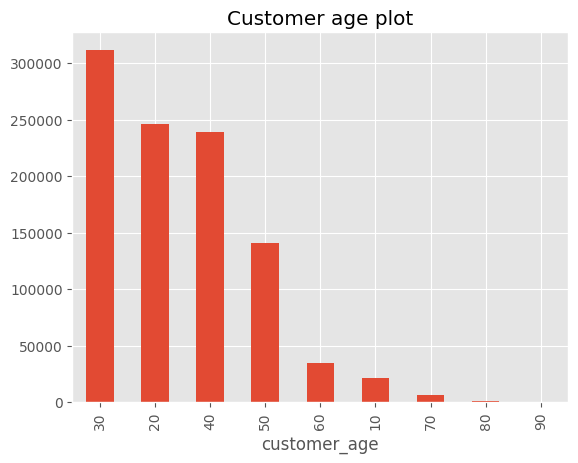

In [54]:
df_base['customer_age'].value_counts() \
.head(10) \
.plot(kind='bar', title='Customer age plot')

Text(0, 0.5, 'count')

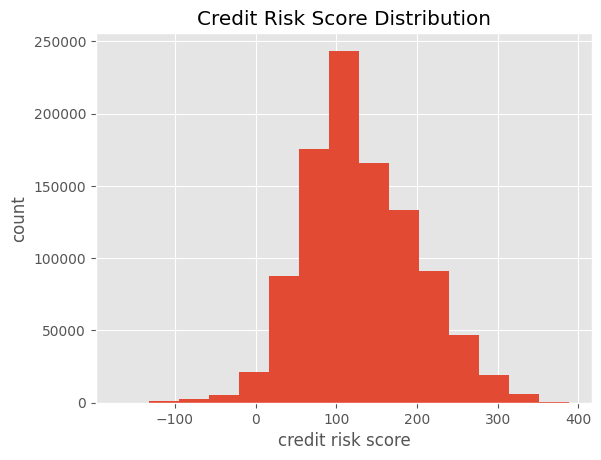

In [67]:
ax = df_base['credit_risk_score'].plot(kind='hist',
                                       bins=15, 
                                       title='Credit Risk Score Distribution')
ax.set_xlabel('credit risk score')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

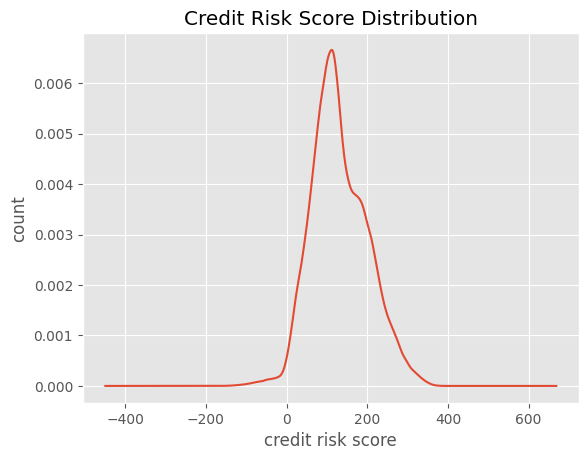

In [68]:
ax = df_base['credit_risk_score'].plot(kind='kde',
                                       title='Credit Risk Score Distribution')
ax.set_xlabel('credit risk score')
ax.set_ylabel('count')

## Visualize the numeric features

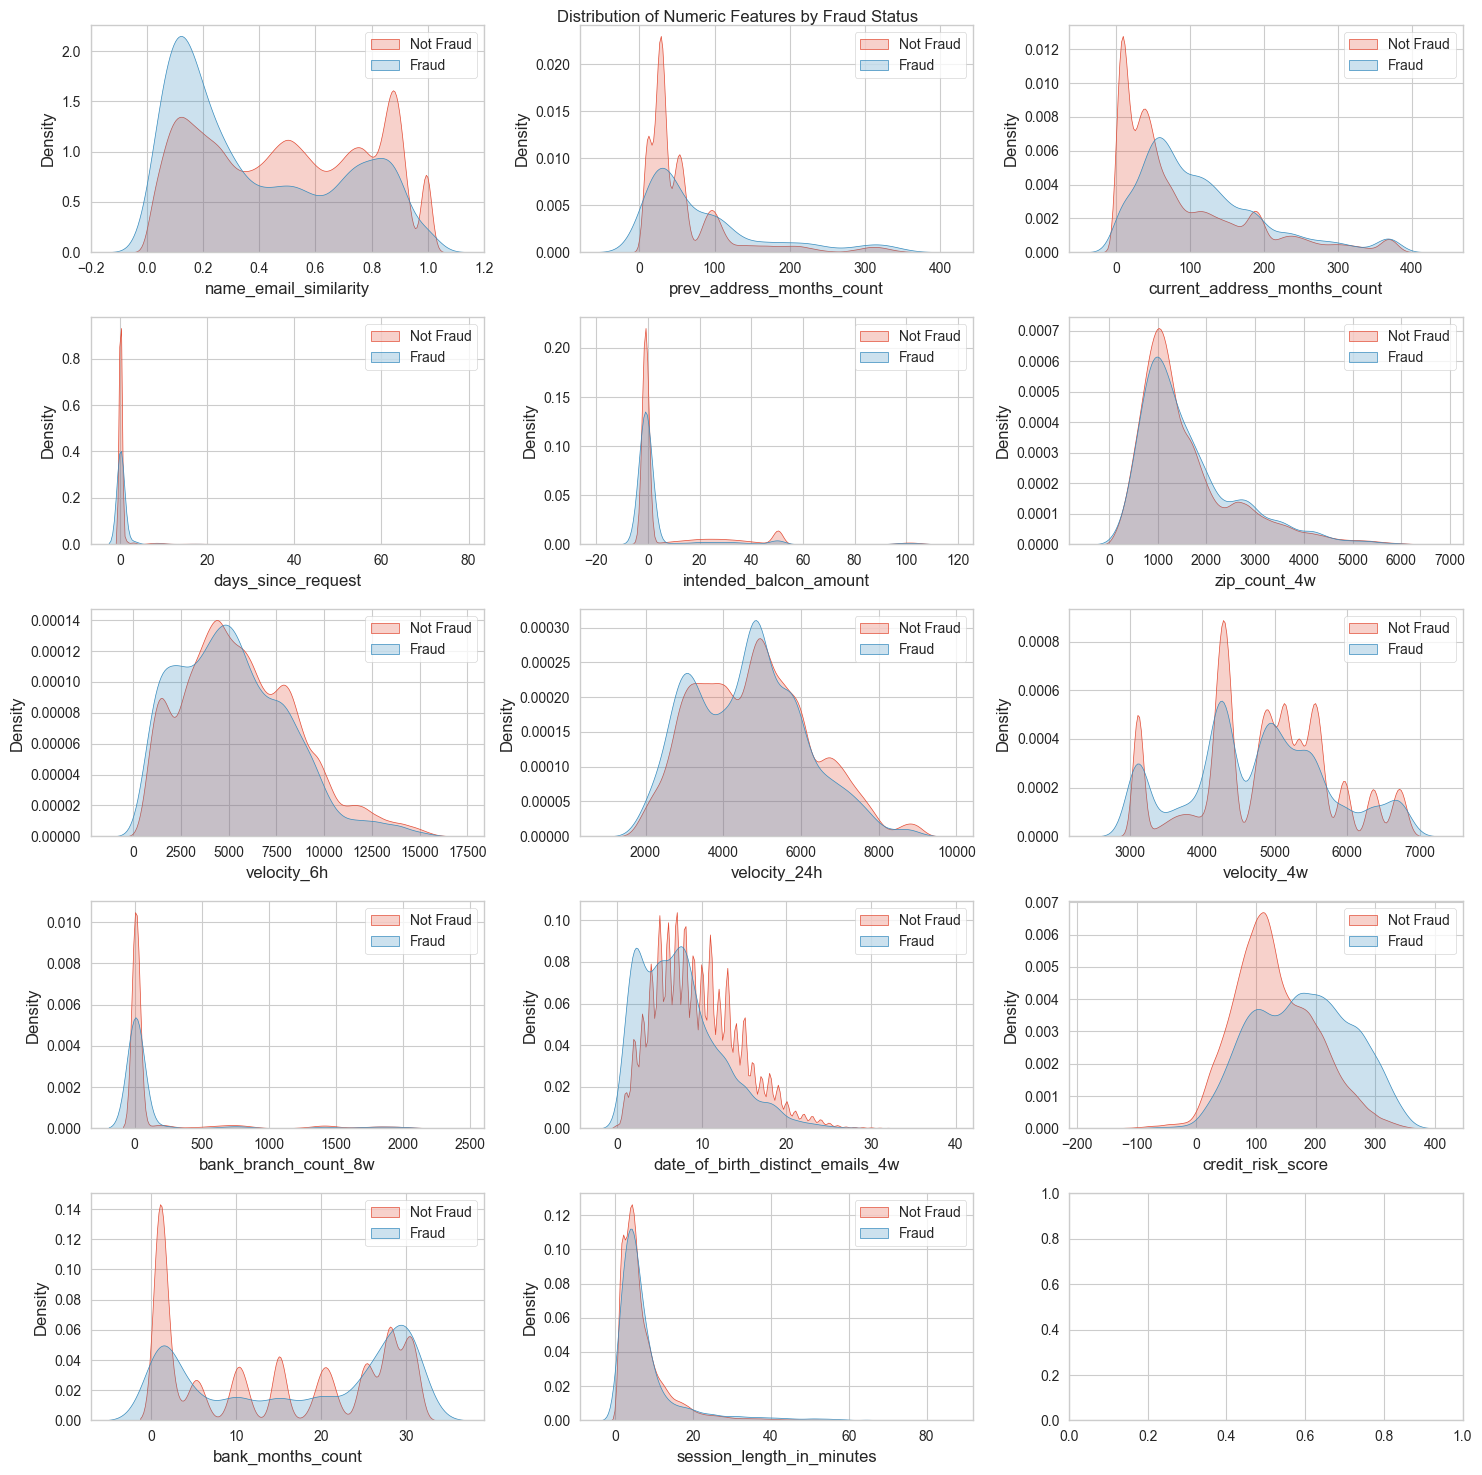

In [98]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numerical_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Plot the distribution of numerical features based on wether it's a fraud or not.
Session_length_in_minutes: high overlaps between fraud and not fraud, maybe suggest little association with the feature? 

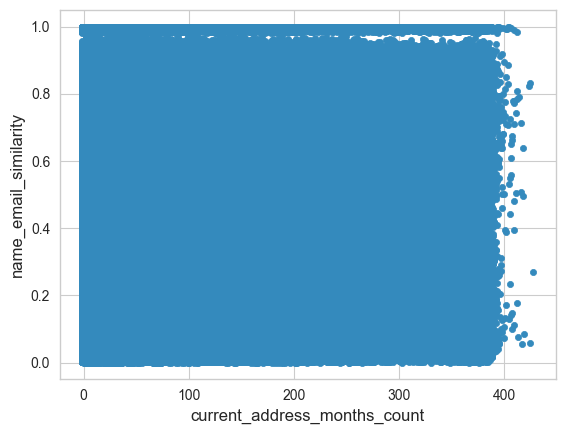

In [114]:
df_base.plot(kind='scatter',
            y='name_email_similarity',
            x='current_address_months_count')
plt.show()

In [ ]:
sns.scatterplot(x='credit_risk_score', 
                y='name_email_similarity', 
                hue='fraud_bool', 
                data=df_base)
# hold shift+tab inside the bracket to see the variables to be provided in a function 

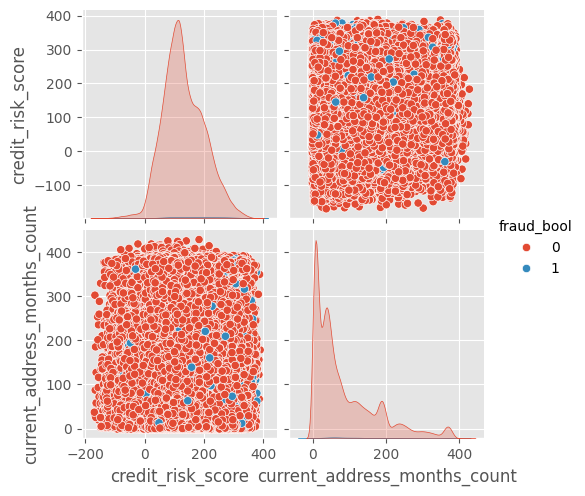

In [15]:
sns.pairplot(df_base, vars=[
                            'credit_risk_score', 
                            'current_address_months_count'],
            hue='fraud_bool')
plt.show()

In [115]:
df_corr = df_base[numerical_features].corr()
df_corr

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,session_length_in_minutes
name_email_similarity,1.000000,-0.018186,0.050305,-0.007736,0.029040,0.025114,0.024881,0.035221,0.039968,-0.001470,0.022994,0.049126,-0.006351,0.005998
prev_address_months_count,-0.018186,1.000000,-0.271730,0.078107,-0.009428,-0.029638,-0.001265,0.009020,0.005413,-0.040628,0.059560,-0.016104,-0.045550,0.051425
current_address_months_count,0.050305,-0.271730,1.000000,-0.057836,0.057601,0.047286,0.027508,0.018753,0.026172,0.054202,-0.174714,0.094976,0.071997,-0.033574
days_since_request,-0.007736,0.078107,-0.057836,1.000000,0.019782,0.000249,0.027968,0.023869,0.017706,-0.018173,0.018731,-0.088141,-0.027460,0.049613
intended_balcon_amount,0.029040,-0.009428,0.057601,0.019782,1.000000,0.002251,0.042849,0.064080,0.051407,0.102919,-0.027343,0.002058,0.178374,0.022811
zip_count_4w,0.025114,-0.029638,0.047286,0.000249,0.002251,1.000000,0.142372,0.201186,0.302955,0.005958,0.126885,-0.102645,0.053637,0.039687
velocity_6h,0.024881,-0.001265,0.027508,0.027968,0.042849,0.142372,1.000000,0.464003,0.400254,0.020140,0.118752,-0.145254,0.014874,0.054491
velocity_24h,0.035221,0.009020,0.018753,0.023869,0.064080,0.201186,0.464003,1.000000,0.539115,0.036062,0.155434,-0.146770,0.018855,0.066875
velocity_4w,0.039968,0.005413,0.026172,0.017706,0.051407,0.302955,0.400254,0.539115,1.000000,0.031267,0.242365,-0.168766,0.032344,0.079005
bank_branch_count_8w,-0.001470,-0.040628,0.054202,-0.018173,0.102919,0.005958,0.020140,0.036062,0.031267,1.000000,-0.036952,-0.014569,0.142625,0.004887


<Axes: >

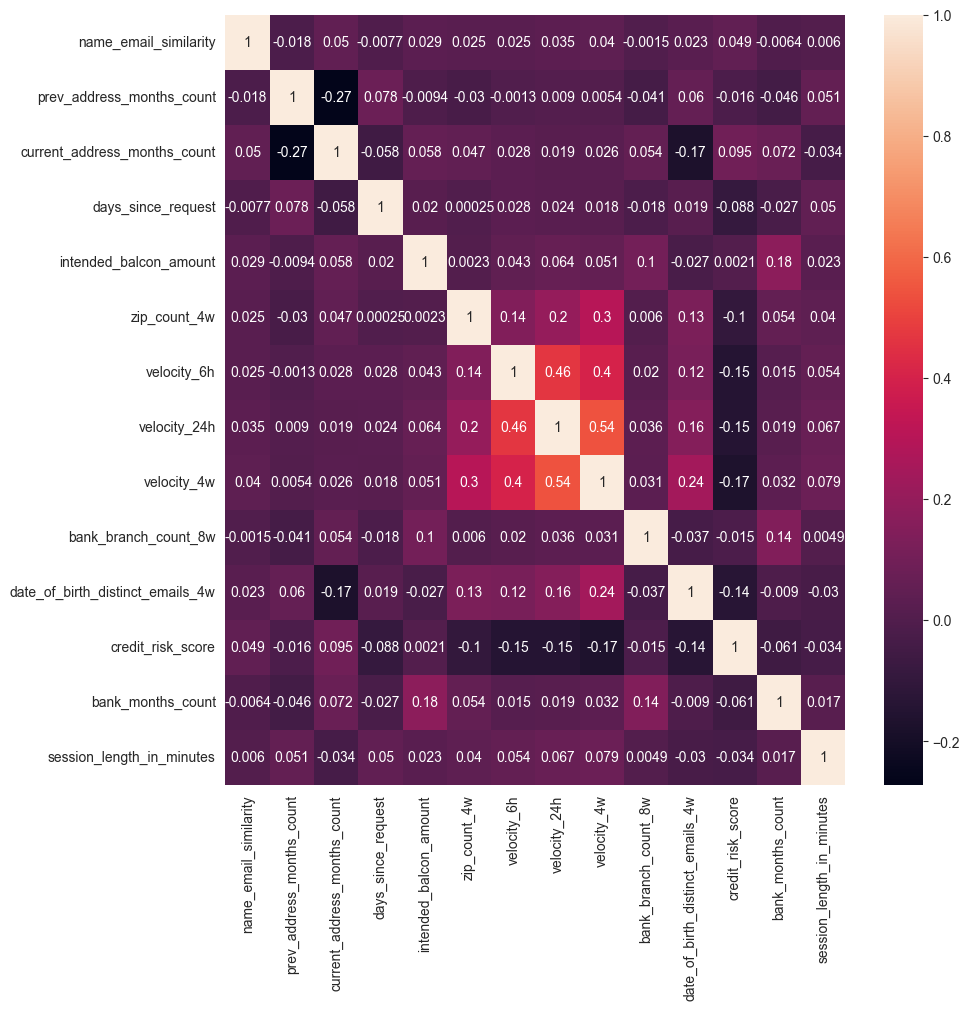

In [124]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True)

# Step 4: Ask a question about the dataset

What is the age group with the highest fraud rate? 

In [60]:
# Group by customer age and calculate total records and fraud cases per group
fraud_data = df_base.groupby('customer_age').agg(
    total_customers=('fraud_bool', 'count'),
    fraud_cases=('fraud_bool', 'sum')   # Sum works because fraud_bool is 0/1
)

# Calculate fraud rate for each age group
fraud_data['fraud_rate'] = fraud_data['fraud_cases'] / fraud_data['total_customers']

# Calculate the correlation between customer_age and fraud_rate
correlation = fraud_data.reset_index().corr().loc['customer_age', 'fraud_rate']

print(f"Correlation between customer_age and fraud_rate: {correlation}")


Correlation between customer_age and fraud_rate: 0.9789088012740712


In [57]:
df_base.query("customer_age != 'NA'") \
.groupby('customer_age') \
.size() \
.reset_index(name='count') \
.sort_values(by='count')

,customer_age,count
8,90,76
7,80,1297
6,70,6517
0,10,20987
5,60,34770
4,50,140353
3,40,238712
1,20,245855
2,30,311433
